In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2


<Axes: >

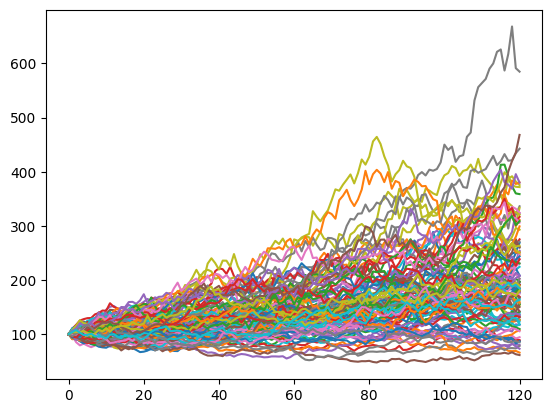

In [2]:
erk.gbm(10,100).plot(legend=False)

In [23]:
def show_gbm(n_scenarios,mu,sigma):
    s0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, s0=s0, mu=mu, sigma=sigma)
    ax = prices.plot(legend=False, color='indianred',alpha=0.7,linewidth=1, figsize=(10,6))
    ax.set_title(f'Geometric Brownian Motion: mu={mu}, sigma={sigma}')
    ax.axhline(s0, color='black', linestyle='--', alpha=0.7)
    plt.show()

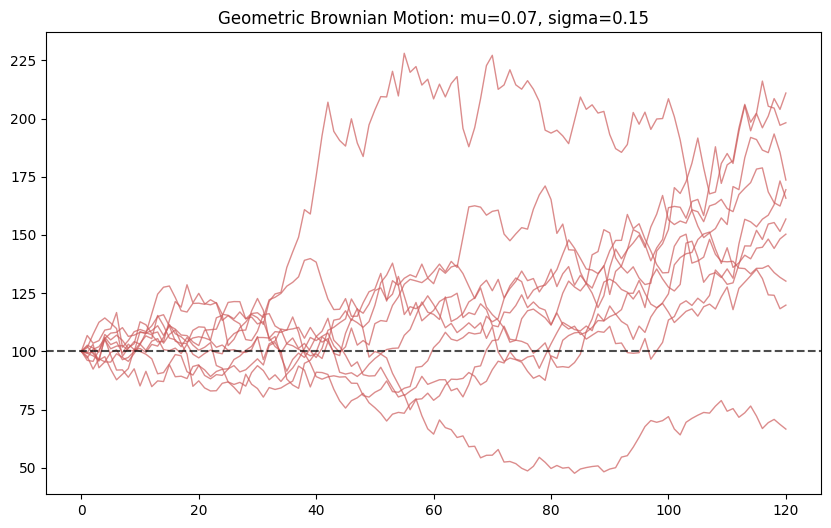

In [24]:
show_gbm(10,0.07,0.15)

In [ ]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=1, value=30, description='n_scenarios'),
                                   mu=widgets.FloatSlider(min=-0.2, max=0.2, step=0.01, value=0.07, description='mu'),
                                   sigma=widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.15, description='sigma')
                                  )
display(gbm_controls)

interactive(children=(IntSlider(value=30, description='n_scenarios', max=1000, min=1), FloatSlider(value=0.07,…